# Electrocardiogram Sınıflandırması

## (1) Electrocardiogramlar

👇 [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) veri setini içe aktarın ve ilk 5 satırını görüntüleyin

In [11]:
import pandas as pd
pd.set_option("display.max_columns", None)

# Veriyi indir ve kaydet
!curl -s https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_dataset.csv -o data/electrocardiograms.csv

# Oku
df = pd.read_csv('data/electrocardiograms.csv')

💓 Veri setinin her gözlemi, bir hastanın electrocardiogram (ECG)'ından alınan ölçülmüş kalp atışları dizisidir.

🎯 Hedef ikili değerlidir ve kalp atışının şunları gösterip göstermediğini tanımlar:
* kardiyovasküler hastalık riski 🔴 (1)
* yoksa risk yok 🟢 (0)

## (2) Veri Keşfi

❓ **Soru** ❓

Sayıların neyi temsil ettiği hakkında görsel bir fikir edinmek için her hedef sınıfından bir gözlemi çizin.

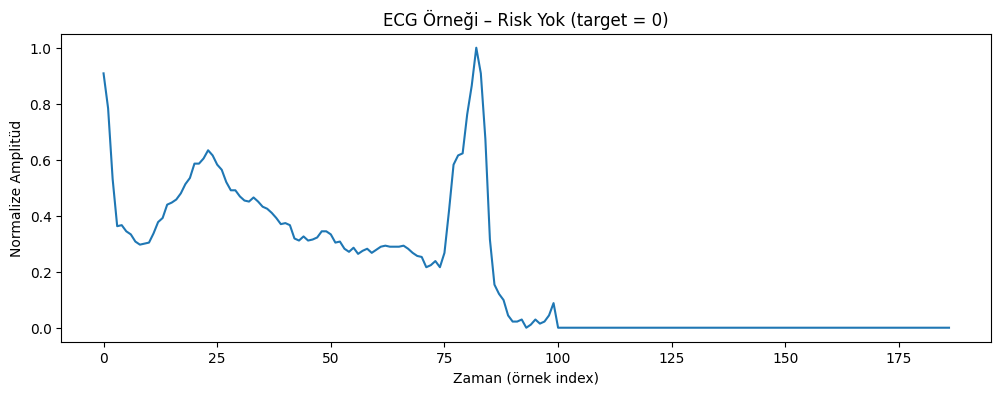

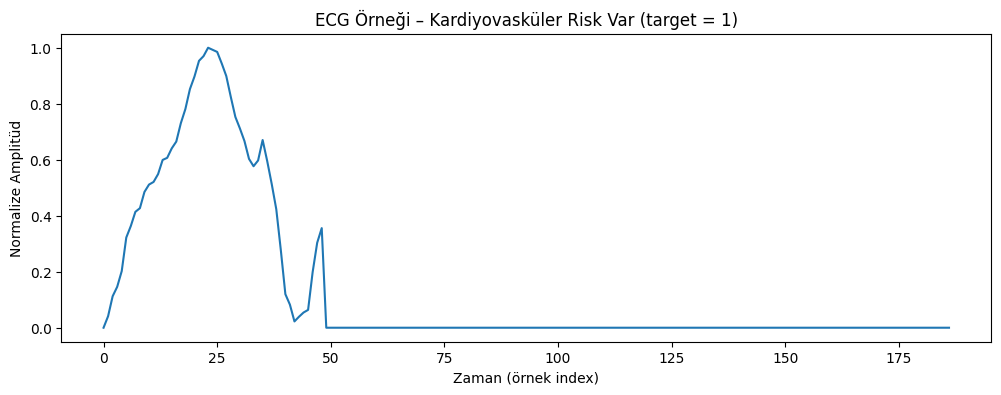

In [12]:
import matplotlib.pyplot as plt

# Feature ve target ayırımı
X = df.drop("target", axis=1)
y = df["target"]

# Risk yok (0) sınıfından bir örnek
sample_0 = X[y == 0].iloc[0]

# Risk var (1) sınıfından bir örnek
sample_1 = X[y == 1].iloc[0]

plt.figure(figsize=(12, 4))
plt.plot(sample_0.values)
plt.title("ECG Örneği – Risk Yok (target = 0)")
plt.xlabel("Zaman (örnek index)")
plt.ylabel("Normalize Amplitüd")
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(sample_1.values)
plt.title("ECG Örneği – Kardiyovasküler Risk Var (target = 1)")
plt.xlabel("Zaman (örnek index)")
plt.ylabel("Normalize Amplitüd")
plt.show()



❓ **Sorular** ❓

* Kaç tane riskli kalp atışı gözlemi var? Cevabınızı `at_risk_count` olarak kaydedin.

In [13]:
at_risk_count = (df["target"] == 1).sum()
at_risk_count

np.int64(1448)

* Kaç tane sağlıklı kalp atışı gözlemi var? Cevabınızı `healthy_count` olarak kaydedin.

In [14]:
healthy_count = (df["target"] == 0).sum()
healthy_count

np.int64(18117)

👩🏻‍🏫 Belirli durumlarda, sınıf dengesi gerçek sınıf dağılımını temsil eder. Burada durum budur: insanların büyük çoğunluğunun aslında sağlıklı kalpleri vardır. Bu durumda, modeli gerçekliğe dayalı olarak eğitmek için sınıf dağılımını koruruz ve modelleme yaklaşımımızı buna göre uyarlarız.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Kodunuzu kontrol edin**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())

##  (3) Logistic Regression

🎯 Göreviniz **kardiyovasküler hastalık riski altındaki kalp atışlarını işaretlemektir.**

👇 Bu görevde `LogisticRegression`'ın performansını araştırarak başlayalım. Modeli aşağıdaki metriklerde değerlendirmek için ***çapraz doğrulama kullanın***:
- Doğruluk (Accuracy)
- Hatırlama (Recall)
- Kesinlik (Precision)
- F1

In [ ]:
# YOUR CODE HERE

❓ **Soru (Doğru tahminlerin oranı)** ❓ 

Bu model için doğru tahminlerin oranı nedir? Cevabınızı `correct_pred_ratio` değişken adıyla kaydedin.

In [ ]:
# YOUR CODE HERE

❓ **Soru (Riskli hastaları işaretleme yeteneği)** ❓ 

Model riskli kalp atışlarının yüzde kaçını işaretleyebiliyor? Cevabınızı `flag_ratio` değişken adıyla kaydedin.

In [ ]:
# YOUR CODE HERE

❓ **Soru (Doğru işaretleme yeteneği)** ❓ 

Model riskli bir kalp atışı sinyali verdiğinde, ne sıklıkta doğrudur? Cevabınızı `correct_detection_ratio` değişken adıyla kaydedin.

In [ ]:
# YOUR CODE HERE

❓ **Soru (Çok fazla yanlış alarm olmadan mümkün olduğunca çok riskli hastayı tespit etme)** ❓ 

Modelin yanlış alarmları sınırlarken mümkün olduğunca çok riskli kalp atışını işaretleme yeteneği nedir? Cevabınızı `aggregated_metric` değişken adıyla kaydedin.

In [ ]:
# YOUR CODE HERE

🧪 **Kodunuzu kontrol edin**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())

▶️ Devam etmeden önce aşağıdaki hücreyi çalıştırın:

In [ ]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


## (4) Karışıklık Matrisi

👇 `ConfusionMatrixDisplay` ([dokümantasyon](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)) kullanarak, Logistic Regression modelinin tahmin dökümünü görselleştirin.

<details>
<summary>💡 İpuçları</summary>

    
1. [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)    
2. [from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
    
- Veri setinizi [`train-test-split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ile ayırmak ve test setindeki karışıklık matrisine bakmak için **Holdout yöntemine** geri dönmeyi unutmayın.  
</details>

In [ ]:
# YOUR CODE HERE

ℹ️ Karışıklık matrisi, modelin sınıf dengesizliğinden etkilendiğini göstermelidir: kalp atışlarını çoğu zaman sağlıklı olarak tahmin eder. Bu davranış nedeniyle, model sıklıkla doğrudur ve **yüksek doğruluğa** sahiptir. Ancak bu aynı zamanda birçok riskli kalp atışını kaçırmasına da neden olur: **kötü hatırlama** oranına sahiptir...

👉 Bu nedenle bu model **riskli gözlemleri işaretleme** görevinde zayıftır.

❗️ Doğrulukla kandırılmayın ve görevinize karşılık gelen metriğe bakın! ❗️

## (5) KNN Sınıflandırıcı

❓ **Soru (Sınıflandırma Model Seçimi)** ❓ 

Varsayılan bir KNN sınıflandırıcı, riskli gözlemleri işaretleme görevinde daha iyi performans gösterir mi?

Cevabınızı "KNN" veya "LogisticRegression" olarak `best_model` altında kaydedin.

In [ ]:
# YOUR CODE HERE

💪 Bu ECG veri seti için, KNN Sınıflandırıcı LogisticRegression'dan çok daha yüksek hatırlama oranına sahip olmalı ve bu nedenle görev için daha uygun.

🧪 **Kodunuzu kontrol edin**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

## (6) Sınıflandırma Raporu

Daha yüksek hatırlama oranı sayesinde KNN modelini seçtiğimize göre, şimdi diğer sınıflandırma performans metriklerine bakalım.

❓ **Soru (Sınıflandırma Raporu)** ❓

KNN modelinin [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)'unu yazdırın.

<details>
    <summary> 💡 <i>İpucu</i>  </summary>
    
* Modelin tahminlerini bir `classification_report`'a geçirmeniz gerekecek.
    
* SkLearn'ün [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) yardımcı olabilir 😉
</details>

In [ ]:
# YOUR CODE HERE

❓ **Soru (Raporu okuma)** ❓

Riskli olarak tahmin edilen kalp atışları arasında, doğru tahminlerin oranı nedir?

Matematiksel terimlerle, raporda $ \frac{TP}{TP + FP} $ oranını okuyabilir misiniz? Bu sınıflandırma metriğinin adı nedir?

Cevabınızı `correct_at_risk_predictions` altında float olarak kaydedin

In [ ]:
# YOUR CODE HERE

🧪 **Kodunuzu kontrol edin**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())

## (7) Tahmin

❓ **Soru (Tahmin etme)** ❓

Bir hasta ikinci görüş için size geliyor çünkü kalp atışlarına dayanarak bu hastanın risk altında olabileceği söylenmiş.

Optimal modelinize göre, o risk altında mı yoksa değil mi?

Modelinizin tahminini "at risk" veya "healthy" olarak `prediction` değişken adı altında kaydedin.

In [ ]:
new_patient = pd.read_csv('https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_new_patient.csv')
new_patient

In [ ]:
# YOUR CODE HERE

🧪 **Kodunuzu kontrol edin**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())

🏁 Tebrikler!

💾 Notebook'unuzu git add/commit/push yapmayı unutmayın...

🚀 ... ve bir sonraki zorluğa geçin!